[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=lab/tree/PySDM_examples/Alpert_and_Knopf_2016/fig_4.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Alpert_and_Knopf_2016/fig_4.ipynb)

#### based on Fig. 4 from Alpert and Knopf 2016 (Atmos. Chem. Phys. 16) "_Analysis of isothermal and cooling-rate-dependent immersion freezing by a unifying stochastic ice nucleation model_"
https://doi.org/10.5194/acp-16-2083-2016

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install atmos-cloud-sim-uj-utils
    from atmos_cloud_sim_uj_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples>=1.13', 'PySDM>=1.13')

In [2]:
from atmos_cloud_sim_uj_utils import show_plot
from PySDM_examples.Alpert_and_Knopf_2016 import simulation, Simulation, Table2
from PySDM.physics.heterogeneous_ice_nucleation_rate import abifm
from PySDM.physics import si, Formulae
from matplotlib import pylab
import numpy as np

In [3]:
cases = Table2()
temperature_range=(228*si.K, 258*si.K)

In [4]:
sim = Simulation(cases=cases, dt=10*si.s, heterogeneous_ice_nucleation_rate='ABIFM', 
                 temperature_range=temperature_range)

In [5]:
sim.run(('Cr1', 'Cr2'))

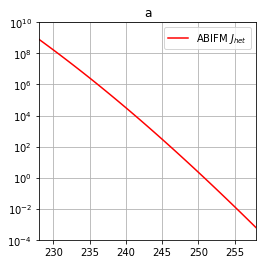

HTML(value="<a href='./tmpe7tbj616.pdf' target='_blank'>./tmpe7tbj616.pdf</a><br>")

In [6]:
abifm.c = -10.67
abifm.m = 54.48
formulae = Formulae(heterogeneous_ice_nucleation_rate='ABIFM')
x = np.linspace(*temperature_range) * si.K
y = formulae.heterogeneous_ice_nucleation_rate.J_het(
    formulae.saturation_vapour_pressure.a_w_ice.py_func(x)
)
pylab.title("a")
pylab.grid()
pylab.plot(x, y, color='red', label='ABIFM $J_{het}$')
pylab.yscale('log')
pylab.xlim(temperature_range)
pylab.ylim(1e-4, 1e10)
pylab.legend()
# pylab.gca().set_box_aspect(1)
show_plot()

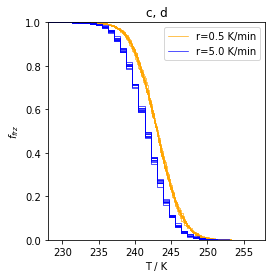

HTML(value="<a href='./tmp489xsewf.pdf' target='_blank'>./tmp489xsewf.pdf</a><br>")

In [7]:
sim.plot(ylim=(0, 1))
pylab.title("c, d")
show_plot()